In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import copy
import random
from scipy.stats import norm, pearsonr
from scipy.optimize import linear_sum_assignment
import math

In [2]:
mnist_train = pd.read_csv('../MNIST/mnist_train.csv')

zeros = mnist_train.loc[mnist_train["5"]==0]
ones = mnist_train.loc[mnist_train["5"]==1]
twos = mnist_train.loc[mnist_train["5"]==2]
threes = mnist_train.loc[mnist_train["5"]==3]
fours = mnist_train.loc[mnist_train["5"]==4]
fives = mnist_train.loc[mnist_train["5"]==5]
sixes = mnist_train.loc[mnist_train["5"]==6]
sevens = mnist_train.loc[mnist_train["5"]==7]
eights = mnist_train.loc[mnist_train["5"]==8]
nines = mnist_train.loc[mnist_train["5"]==9]

In [3]:
sample0_1 = np.array(zeros.iloc[0, 1:]).reshape((28, 28)).astype('float32')
sample0_2 = np.array(zeros.iloc[10, 1:]).reshape((28, 28)).astype('float32')
sample1_1 = np.array(ones.iloc[0, 1:]).reshape((28, 28)).astype('float32')
sample2_1 = np.array(twos.iloc[0, 1:]).reshape((28, 28)).astype('float32')
sample3_1 = np.array(threes.iloc[0, 1:]).reshape((28, 28)).astype('float32')
sample4_1 = np.array(fours.iloc[0, 1:]).reshape((28, 28)).astype('float32')
sample4_2 = np.array(fours.iloc[3, 1:]).reshape((28, 28)).astype('float32')
sample5_1 = np.array(fives.iloc[0, 1:]).reshape((28, 28)).astype('float32')
sample6_1 = np.array(sixes.iloc[0, 1:]).reshape((28, 28)).astype('float32')
sample7_1 = np.array(sevens.iloc[0, 1:]).reshape((28, 28)).astype('float32')
sample8_1 = np.array(eights.iloc[0, 1:]).reshape((28, 28)).astype('float32')
sample9_1 = np.array(nines.iloc[0, 1:]).reshape((28, 28)).astype('float32')

In [4]:
myImg = sample1_1

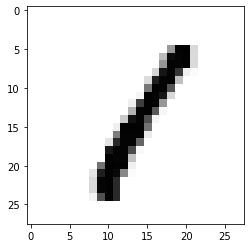

In [5]:
plt.imshow(myImg, cmap="Greys")

In [6]:
def createItem(Img, row, col):
    a = Img[row, col]
    b = Img[row, col + 1]
    c = Img[row + 1, col]
    d = Img[row + 1, col + 1]
    
    result = np.array([a, b, c, d])
    return result.reshape(2, 2)


In [7]:
def getAngle(item):
    a = item[0, 0]
    b = item[0, 1]
    c = item[1, 0]
    d = item[1, 1]
    
    machine_epsilon = 10**(-16)

#     Hor = abs(a - b) + abs(c - d)
#     Vert = abs(a - c) +  abs(b - d)
    
    Hor = (a - b) + (c - d)
    Vert = (a - c) + (b - d)
    # Don't process images with no edges
    if Hor == 0 and Vert == 0:
        return -1
    
    Vert = Vert + machine_epsilon
            
    return round(np.arctan(Hor/Vert)*360/(2*np.pi), 2)

In [8]:
def convertToAngle(Img):
    nrows = int(len(Img)-1)
    ncols = int(len(Img)-1)
    
    result = np.zeros(shape=(nrows, ncols))
    
    for row in range(len(Img)-1):
        for col in range(len(Img[0])-1):
            item = createItem(Img, row, col)
            angle = getAngle(item)
            
            if angle != -1:
                result[row, col] = angle
            
    return result

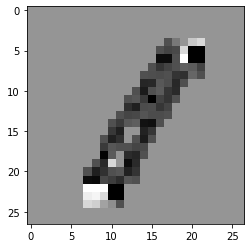

In [9]:
plt.imshow(convertToAngle(myImg), cmap="Greys")

In [10]:
createItem(myImg, 2, 3)

array([[0., 0.],
       [0., 0.]], dtype=float32)

In [11]:
def getAvgAngle(Img):
    result = []
    sample = copy.deepcopy(Img[10:18, 10:18])
    print("from get average angle: ", sample.size)
    print("")
    for row in range(len(sample)-1):
        for col in range(len(sample[0])-1):

            a = sample[row, col]
            b = sample[row, col + 1]
            c = sample[row + 1, col]
            d = sample[row + 1, col + 1]
                        
            machine_epsilon = 10**(-16)
            
            Hor = abs(a - b) + abs(c - d)
            Vert = abs(a - c) +  abs(b - d) + machine_epsilon
            result.append(np.arctan(Hor/Vert)*360/(2*np.pi))
    
    return np.mean(result)

In [13]:
result = {}
result["Rotated Angle"] = []
result["Calculated Angle"] = []

for i in range(361):
    rotatedImg = copy.deepcopy(imutils.rotate(myImg, angle=i))
#     print(rotatedImg)
    print("from start: ", rotatedImg.size)
    angle = getAvgAngle(rotatedImg)
    
    result["Rotated Angle"].append(i)
    result["Calculated Angle"].append(angle)

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average 

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average angle:  64

from start:  784
from get average 

In [14]:
pd.DataFrame(result)

,Rotated Angle,Calculated Angle
0,0,40.495345
1,1,49.894555
2,2,51.029895
3,3,52.535483
4,4,53.706962
...,...,...
356,356,44.300913
357,357,44.728698
358,358,45.015025
359,359,45.256298


In [15]:
a = 1
b = 10**(-16)

np.arctan(a/b)*(360/np.pi)

180.0

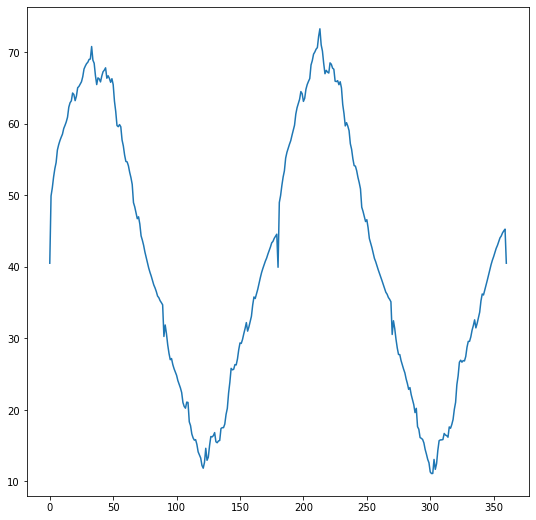

In [16]:
plt.figure(figsize = (9, 9))
plt.plot(result['Rotated Angle'], result['Calculated Angle'])